### Obrada informacija

# 4. Laboratorijska vježba:  Multivarijatni financijski vremenski nizovi

*Prosinac 2023.*

## Upute

U ovoj bilježnici dana je priprema sa svim uputama za 4. laboratorijsku vježbu iz predmeta Obrada informacija - uz bilježnicu su dostupni i podatci u datoteci `prices.csv`.

Vaš zadatak je u bilježnicu na odgovarajuća mjesta dopisati kod Vašeg rješenja,.

**Riješenu bilježnicu potrebno je predati kao izvještaj u .pdf formatu na *Moodle* najkasnije do 14.1.2024. u 23:59h. Datoteka koju predajete se mora zvati *PrezimeImeJMBAG.pdf*.**



## Uvod

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne dnevne cijene 24 ETF-a (eng. *exchange traded fund*) koji prate određene dioničke, obvezničke ili druge indekse.

Oznaka | Naziv | Klasa imovine
--- | --- | ---
SPY | SPDR S&P 500 ETF Trust | Equity: U.S. - Large Cap
IEFA | iShares Core MSCI EAFE ETF | Equity: Developed Markets Ex-U.S. - Total Market
VWO | Vanguard FTSE Emerging Markets ETF | Equity: Emerging Markets - Total Market
EWJ | iShares MSCI Japan ETF | Equity: Japan - Total Market
XLF | Financial Select Sector SPDR Fund | Equity: U.S. Financials
XLK | Technology Select Sector SPDR Fund | Equity: U.S. Technology
XLV | Health Care Select Sector SPDR Fund | Equity: U.S. Health Care
XLY | Consumer Discretionary Select Sector SPDR Fund | Equity: U.S. Consumer Cyclicals
XLP | Consumer Staples Select Sector SPDR Fund | Equity: U.S. Consumer Non-cyclicals
XLU | Utilities Select Sector SPDR Fund | Equity: U.S. Utilities
XLI | Industrial Select Sector SPDR Fund | Equity: U.S. Industrials
XLE | Energy Select Sector SPDR Fund | Equity: U.S. Energy
XLC | Communication Services Select Sector SPDR Fund | Equity: U.S. Telecommunications
XLRE | Real Estate Select Sector SPDR Fund | Equity: U.S. Real Estate
XLB | Materials Select Sector SPDR Fund | Equity: U.S. Basic Materials
BND | Vanguard Total Bond Market ETF | Fixed Income: U.S. - Broad Market |  Broad-based Investment Grade
LQD | iShares iBoxx USD Investment Grade Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based Investment Grade
BNDX | Vanguard Total International Bond ETF | Fixed Income: Global Ex-U.S. - Broad Market |  Broad-based Investment Grade
SHV | iShares Short Treasury Bond ETF | Fixed Income: U.S. - Government |  Treasury Investment Grade Ultra-Short Term
HYG | iShares iBoxx USD High Yield Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based High Yield
GLD | SPDR Gold Trust | Commodities: Precious Metals Gold
SLV | iShares Silver Trust | Commodities: Precious Metals Silver
PDBC | Invesco Optimum Yield Diversified Commodity Strategy No K-1 ETF | Commodities: Broad Market
USO | United States Oil Fund LP | Commodities: Energy Crude Oil

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, koristit ćemo aritmetičke povrate:

$R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$

gdje je $S(t)$ cijena vrijednosnice u danu $t$. U sklopu ove laboratorijske vježbe cilj je analizirati kretanje danih ETF-ova i izračunati glavne komponente (PCA) koje utječu na njihovu dinamiku. Laboratorijsku vježbu je potrebno riješiti unutar ove bilježnice i predati riješenu bilježnicu kao izvještaj.

In [1]:
import pandas as pd

prices = pd.read_csv('prices.csv')
prices.set_index('Time', inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()


,SPY,IEFA,VWO,EWJ,XLF,XLK,XLV,XLY,XLP,XLU,...,XLB,BND,LQD,BNDX,SHV,HYG,GLD,SLV,PDBC,USO
Time,,,,,,,,,,,,,,,,,,,,,
2019-01-02,231.492233,48.000053,33.417080,47.497765,21.776472,59.029892,78.483353,95.259102,44.591763,44.784126,...,46.068901,69.980576,97.039024,48.517841,101.234894,63.253788,121.330002,14.56,8.545244,78.800003
2019-01-03,225.968170,47.684727,32.893154,47.227894,21.286907,56.050797,76.889748,93.196533,44.335598,44.775520,...,44.762505,70.253906,97.081886,48.517841,101.271584,63.285011,122.430000,14.75,8.607411,79.599998
2019-01-04,233.537125,49.129986,33.932262,48.828522,21.994057,58.534962,79.183434,96.280815,45.280781,45.438545,...,46.522518,70.042305,97.021873,48.473194,101.299133,64.347198,121.440002,14.73,8.731748,81.440002
2019-01-07,235.378525,49.366474,34.002121,48.949490,22.021255,59.058445,79.487411,98.457954,45.218948,45.128563,...,46.685822,69.936508,97.030441,48.357071,101.299133,64.971985,121.860001,14.67,8.799566,82.320000
2019-01-08,237.589920,49.716839,34.194221,49.182148,22.039383,59.553371,80.104607,99.546509,45.634129,45.688255,...,47.175724,69.848312,97.244827,48.321350,101.289948,65.393723,121.529999,14.69,8.873038,84.000000


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
prices_len = len(prices)
print(prices_len)

1246


# Zadatak 1 - Računanje korelacijske matrice i matrice kovarijance povrata

1.1. U prvom zadatku ove laboratorijske vježbe potrebno je prvo iz danih cijena (gore učitanih u Pandas DataFrame) izračunati dnevne povrate za sve pojedine vrijednosnice (prateći formulu danu u uvodu).

Izračunajte srednje povrate i volatilnost (standardnu devijaciju povrata) za svaku pojedinu vrijednosnicu. Pri analizi srednjih povrata i volatilnosti, te se brojke često *anualiziraju* - to znači da se srednji povrati pomnože s $252$ (cca. broj trgovinskih dana u godini), a volatilnost s $\sqrt{252}$.

**Izračunajte anualizirane srednje povrate i volatilnosti. Sve ETF-ove prikažite u dijagramu raspršenja s volatilnošću na x-osi i srednjim povratom na y-osi.**

Razmislite - koji se ETF-ovi ističu po odnosu povrata i rizika (posebno dobri ili posebno loši kao investicije)?


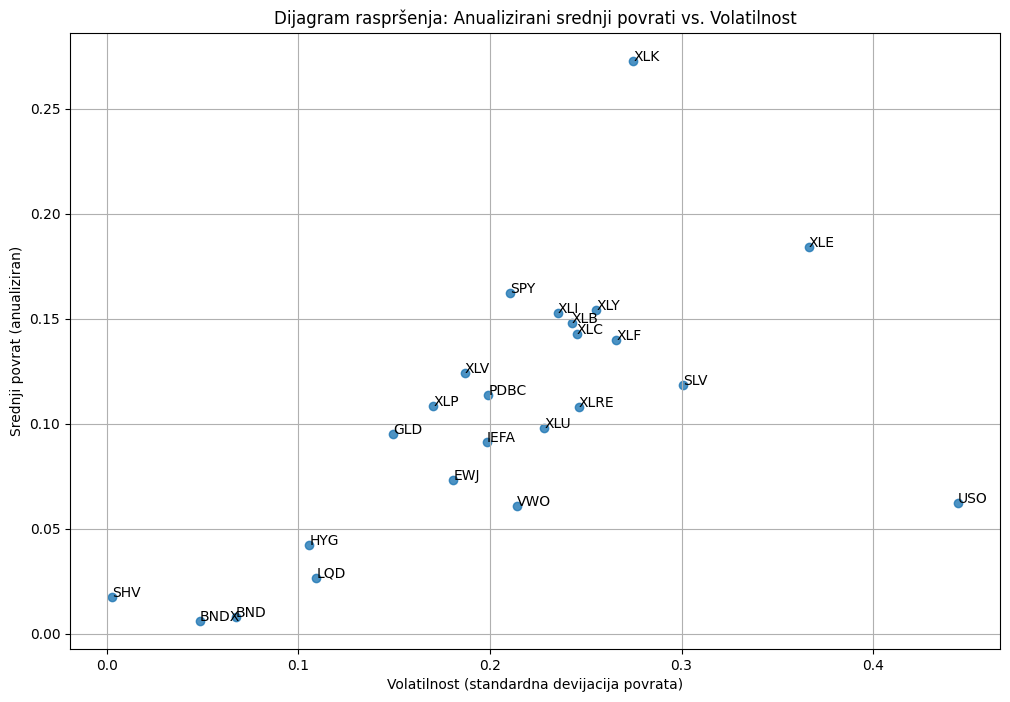

In [4]:
# 1. korak -> racunanje povrata po stupcima (po ETF-u)
daily_returns = prices.pct_change()

# 2.korak -> racunanje srednjih povrata i volatilnosti
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# 3.korak -> za svaku godinu (ukupno 3) -> srednji povrat i volatilnost po TEF-u
annualized_mean_returns = mean_returns * 252
annualized_volatility = volatility * (252 ** 0.5)

# 4.korak ->  za sve ETF-ove nacrtati graf raspršenja (volatilnost na x-osi i srednji povrat na y-osi)
scatter_data = pd.DataFrame({
    'Volatility': annualized_volatility,
    'Mean Return': annualized_mean_returns
})

plt.figure(figsize=(12, 8))
plt.scatter(scatter_data['Volatility'], scatter_data['Mean Return'], alpha=0.8)

# Označavanje ETF-ova
for i, txt in enumerate(scatter_data.index):
    plt.annotate(txt, (scatter_data['Volatility'][i], scatter_data['Mean Return'][i]))

plt.title('Dijagram raspršenja: Anualizirani srednji povrati vs. Volatilnost')
plt.xlabel('Volatilnost (standardna devijacija povrata)')
plt.ylabel('Srednji povrat (anualiziran)')
plt.grid(True)
plt.show()

1.2. Kovarijancu i korelaciju moguće je iz podataka izračunati koristeći Pandas, ali i NumPy ili neke druge biblioteke.

**Koristeći dnevne povrate, izračunajte matricu kovarijance $\Sigma$ i matricu korelacije $C$ povrata svih ETF-ova.
Matrice ispišite u konzolu ili vizualizirajte.**

Proučite strukturu matrice i razmislite o tome koje zajedničke komponente u podatcima možete očekivati.

Matrica kovarijance:
               SPY          IEFA           VWO           EWJ           XLF  \
SPY   1.761574e-04  1.457528e-04  1.376812e-04  1.170823e-04  1.918401e-04   
IEFA  1.457528e-04  1.563030e-04  1.409613e-04  1.259424e-04  1.728926e-04   
VWO   1.376812e-04  1.409613e-04  1.815550e-04  1.112717e-04  1.534720e-04   
EWJ   1.170823e-04  1.259424e-04  1.112717e-04  1.299253e-04  1.357587e-04   
XLF   1.918401e-04  1.728926e-04  1.534720e-04  1.357587e-04  2.808551e-04   
XLK   2.158161e-04  1.701803e-04  1.706754e-04  1.387625e-04  2.036297e-04   
XLV   1.318726e-04  1.061152e-04  9.604616e-05  8.357183e-05  1.406268e-04   
XLY   1.934884e-04  1.614538e-04  1.574461e-04  1.310982e-04  1.994529e-04   
XLP   1.107683e-04  8.944329e-05  7.605146e-05  7.151245e-05  1.225315e-04   
XLU   1.274866e-04  1.049761e-04  8.575088e-05  8.290778e-05  1.461856e-04   
XLI   1.753387e-04  1.551730e-04  1.373171e-04  1.224394e-04  2.245905e-04   
XLE   1.907531e-04  1.835906e-04  1.738178e

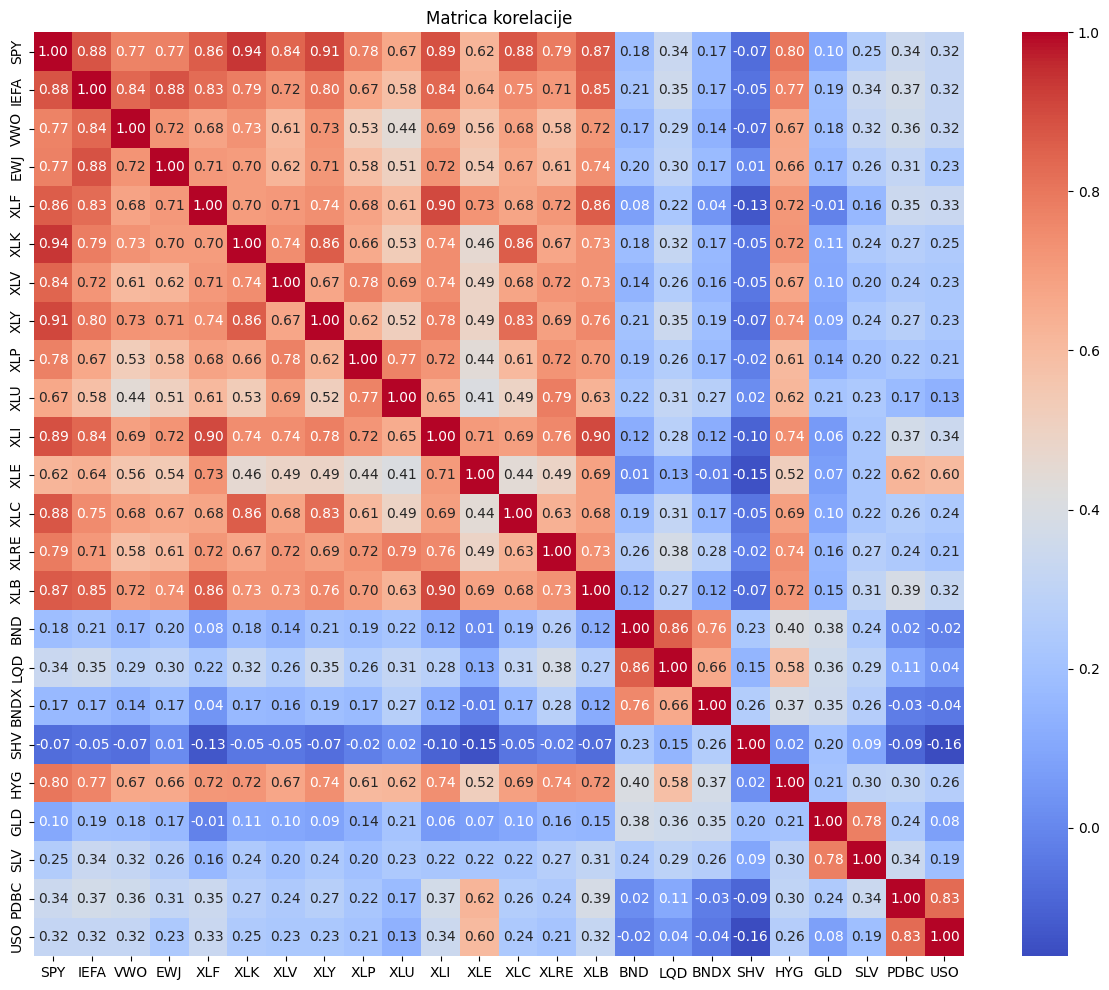

In [5]:
covariance_matrix = daily_returns.cov()
correlation_matrix = daily_returns.corr()

print("Matrica kovarijance:")
print(covariance_matrix)

print("\nMatrica korelacije:")
print(correlation_matrix)


# Vizualizacija matrice korelacije
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matrica korelacije')
plt.show()

# Zadatak 2 - Analiza glavnih komponenti

2.1. Za analizu glavnih komponenti potrebno je izračunati svojstvenu dekompoziciju, koju možete pronaći u sklopu biblioteke NumPy https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html.

**Izračunajte svojstvene vektore i pripadajuće svojstvene vrijednosti matrice kovarijance povrata $\Sigma$. Poredajte komponente padajući po svojstvenim vrijednostima i prikažite svojstvene vrijednosti grafički.**



In [6]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [7]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


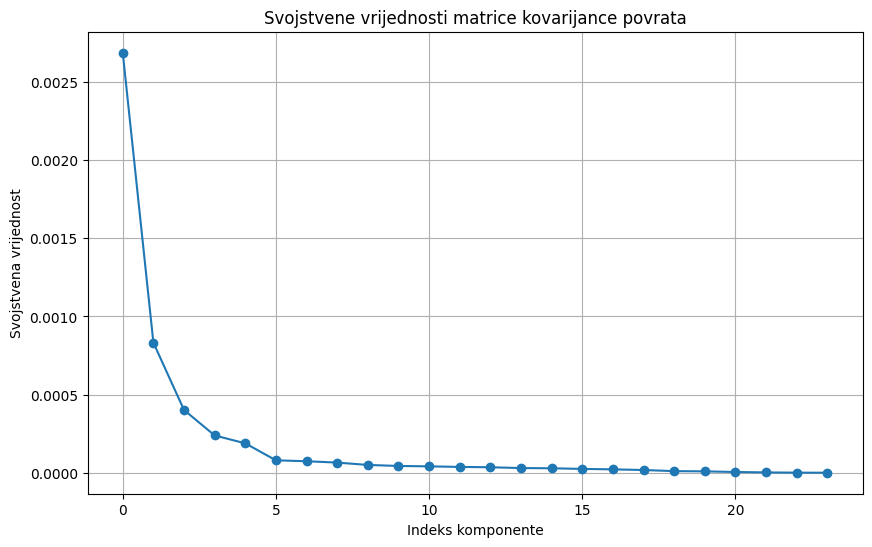

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, marker='o')
plt.title('Svojstvene vrijednosti matrice kovarijance povrata')
plt.xlabel('Indeks komponente')
plt.ylabel('Svojstvena vrijednost')
plt.grid(True)
plt.show()

2.2. **Izračunajte koliki udio varijance objašnjavaju prve tri komponente?**

In [9]:
# Izračunavanje ukupne varijance (suma svih svojstvenih vrijednosti)
total_variance = sum(sorted_eigenvalues)

# Izračunavanje udjela varijance objašnjene prvim tri komponentama
variance_explained_first_three = sum(sorted_eigenvalues[:3]) / total_variance

variance_explained_first_three_percentage = variance_explained_first_three * 100
variance_explained_first_three_percentage


79.71142095322995

2.3. Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti.  

**Prikažite grafički (npr. stupčastim dijagramom za svaku komponentu posebno) koeficijente prve 3 glavne komponente (elemente prva tri svojstvena vektora).**

S obzirom na to koje vrijednosnice opisuju prve tri komponente, razmislite možete li zaključiti kakve zajedničke faktore u tržištu opisuju razmatrane komponente?

NAPOMENA: pripazite na to što vraća funkcija koju koristite i u kojoj se dimenziji (stupac ili red) nalaze svojstveni vektori.

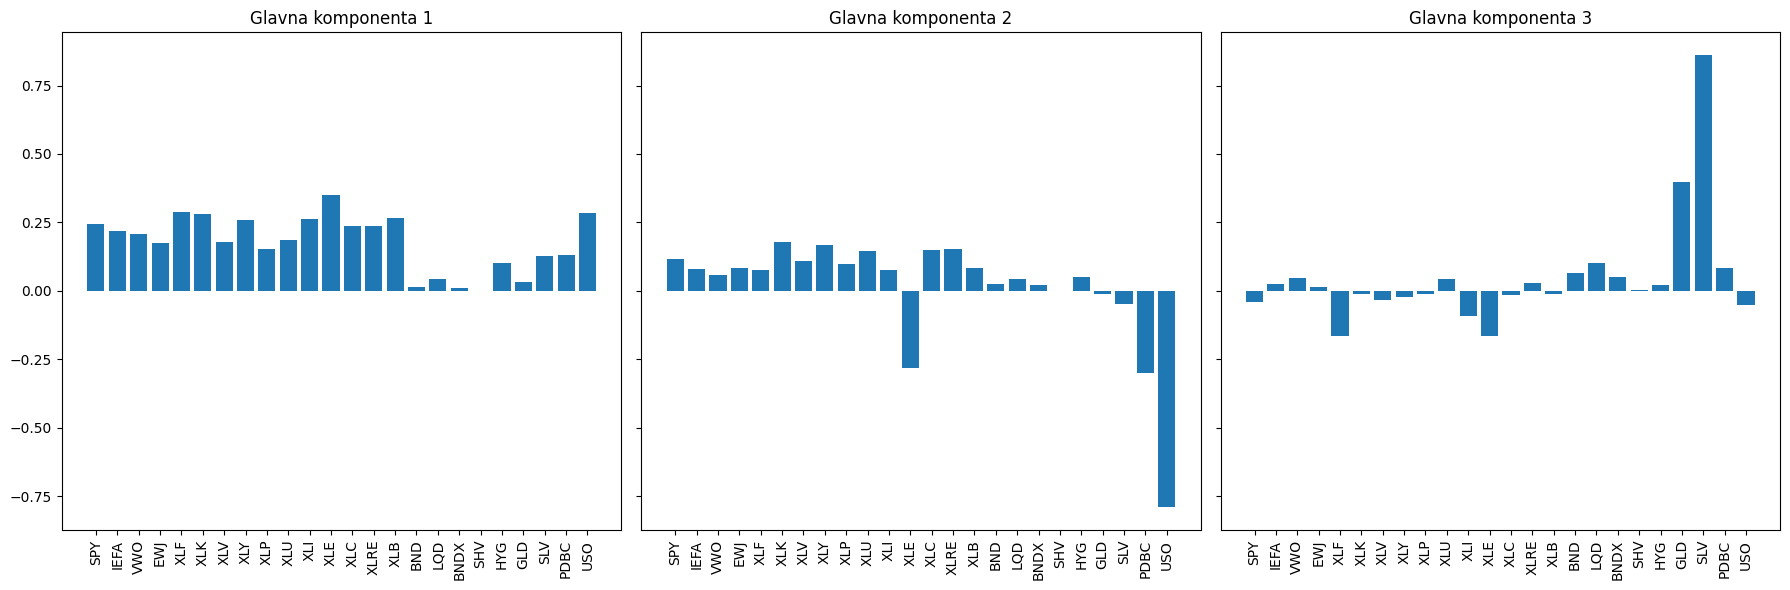

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

etf_names = daily_returns.columns

# Prikazivanje koeficijenata za svaku od prve tri glavne komponente
for i in range(3):
    axes[i].bar(etf_names, sorted_eigenvectors[:, i])
    axes[i].set_title(f'Glavna komponenta {i+1}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


ZAKLJUČAK

1. Glavna komponenta 1: Ova komponenta ima značjne koeficijente za većinu ETF-ova, što ukazuje na to da ova komponenta može opisivati neki opći tržišni faktor koji utječe na većinu vrijednosnica.

2. Glavna komponenta 2: Ovje se može primijetiti kako neki ETF-ovi imaju veće koeficijente, dok su drugi blizu nule ili negativni. To može 
ukazivati na specifične sektorske ili geografske faktore koji utječu na te ETF-ove.

3. Glavna komponenta 3: Slično k+o i kod druge komponente, ova komponenta također ima varijabilne koeficijente, što može upućivati na druge, manje dominantne tržišne faktore ili specifične karakteristike određenih ETF-ova.

2.4. **Ponovite prethodnu analizu za matricu korelacije povrata $C$ (prikažite svojstvene vrijednosti, udio varijance i koeficijente pojedinih komponenti za prve tri komponente).**

Usporedite rezultate - mijenjaju li se interpretacije komponenti?

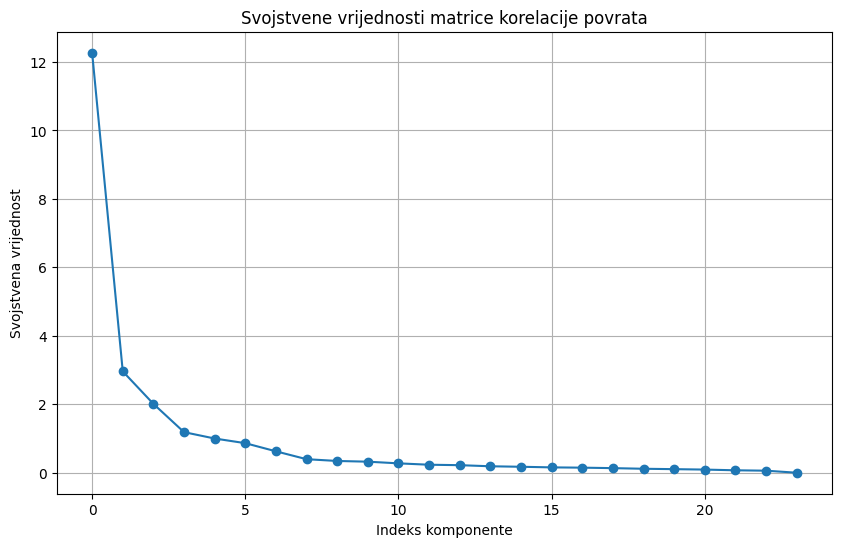

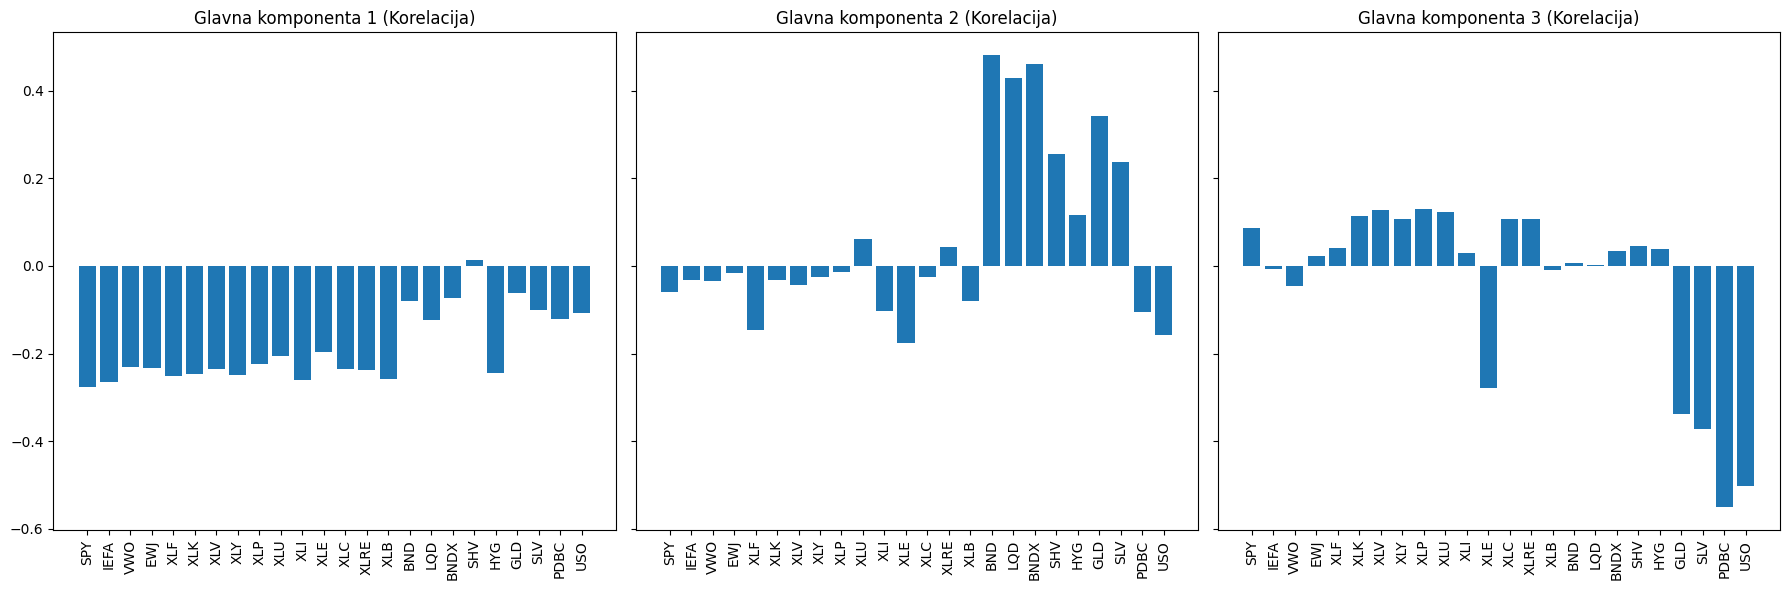

71.86037598887204

In [11]:
eigenvalues_corr, eigenvectors_corr = np.linalg.eig(correlation_matrix)

sorted_indices_corr = np.argsort(eigenvalues_corr)[::-1]
sorted_eigenvalues_corr = eigenvalues_corr[sorted_indices_corr]
sorted_eigenvectors_corr = eigenvectors_corr[:, sorted_indices_corr]

plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues_corr, marker='o')
plt.title('Svojstvene vrijednosti matrice korelacije povrata')
plt.xlabel('Indeks komponente')
plt.ylabel('Svojstvena vrijednost')
plt.grid(True)
plt.show()

total_variance_corr = sum(sorted_eigenvalues_corr)

variance_explained_first_three_corr = sum(sorted_eigenvalues_corr[:3]) / total_variance_corr
variance_explained_first_three_percentage_corr = variance_explained_first_three_corr * 100

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

for i in range(3):
    axes[i].bar(etf_names, sorted_eigenvectors_corr[:, i])
    axes[i].set_title(f'Glavna komponenta {i+1} (Korelacija)')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

variance_explained_first_three_percentage_corr


Analiza glavnih komponenti (PCA) za matricu korelacije povrata  daje sljedeće rezultate:

1. Svojstvene vrijednosti: Graf svojstvenih vrijednosti pokazuje koliko svaka komponenta doprinosi ukupnoj varijaciji povrata. Slično kao i kod matrice kovarijance, prvih nekoliko komponenti ima veće svojstvene vrijednosti, što ukazuje na njihov veći doprinos.

2. Udio varijance: Prve tri komponente objašnjavaju oko 71.86% ukupne varijance. To je nešto manje od udjela koji su objasnile prve tri komponente u analizi matrice kovarijance, ali i dalje predstavlja značajan dio ukupne varijance.

3. Koeficijenti pojedinih komponenti: Stupčasti dijagrami za prve tri glavne komponente prikazuju koeficijente svake komponente za svaki ETF. Ovi grafikoni daju uvid u to kako svaka od komponenti povezuje različite ETF-ove.

# Zadatak 3 - Svojstveni portfelji

U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji.

Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Same težine svojstvenih portfelja mogu biti rotirane i skalirane u odnosu na elemente svojstvenih vektora.

U ovoj analizi ćemo pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:

$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.

Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:

$R_p = \sum{R_i w_i} = R\cdot w$.


**Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve tri glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta tri svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100).**



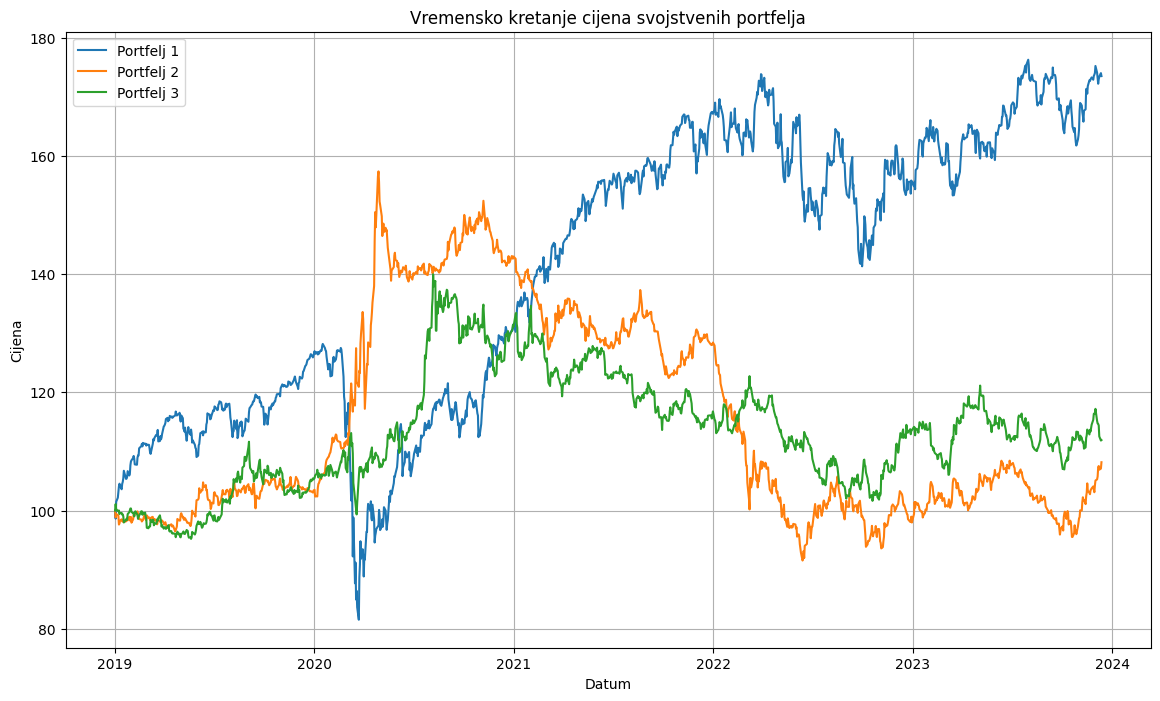

In [12]:
scaled_portfolios = np.copy(sorted_eigenvectors[:, :3]) 

for i in range(3):
    if np.sum(scaled_portfolios[:, i]) < 0:
        scaled_portfolios[:, i] = -scaled_portfolios[:, i]  
    scaled_portfolios[:, i] /= np.sum(np.abs(scaled_portfolios[:, i]))

# Izračunavanje povrata portfelja
portfolio_returns = np.dot(daily_returns.fillna(0), scaled_portfolios)

# Pretvaranje povrata u cijene (početna cijena = 100)
initial_price = 100
portfolio_prices = np.cumprod(1 + portfolio_returns, axis=0) * initial_price

plt.figure(figsize=(14, 8))
for i in range(3):
    plt.plot(daily_returns.index, portfolio_prices[:, i], label=f'Portfelj {i+1}')
plt.title('Vremensko kretanje cijena svojstvenih portfelja')
plt.xlabel('Datum')
plt.ylabel('Cijena')
plt.legend()
plt.grid(True)
plt.show()


Ako usporedite dobivene rezultate s kretanjem cijena originalnih vrijednosnica, vidjet ćete sličnosti između vrijednosnica koje pripadaju određenim klasama imovina i pojedinih svojstvenih portfelja. Svojstveni portfelji dakle predstavljaju niže-dimenzionalan prostor tzv. sintetičkih vrijednosnica (u našem slučaju 3 umjesto originalnih 24) koje najbolje opisuju cijeli razmatrani skup podataka. Dobra procjena tih komponenti je ključna u razumijevanju zajedničkog kretanja većih skupova dionica i upravljanju financijskim rizikom.

Razmislite što to znači za tržište koje smo analizirali - koji su glavni izvori rizika prevladavali u razmatranom periodu?